In [69]:
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from umap import UMAP # umap-learn библиотека

from sklearn.preprocessing import StandardScaler
import plotly.express as px

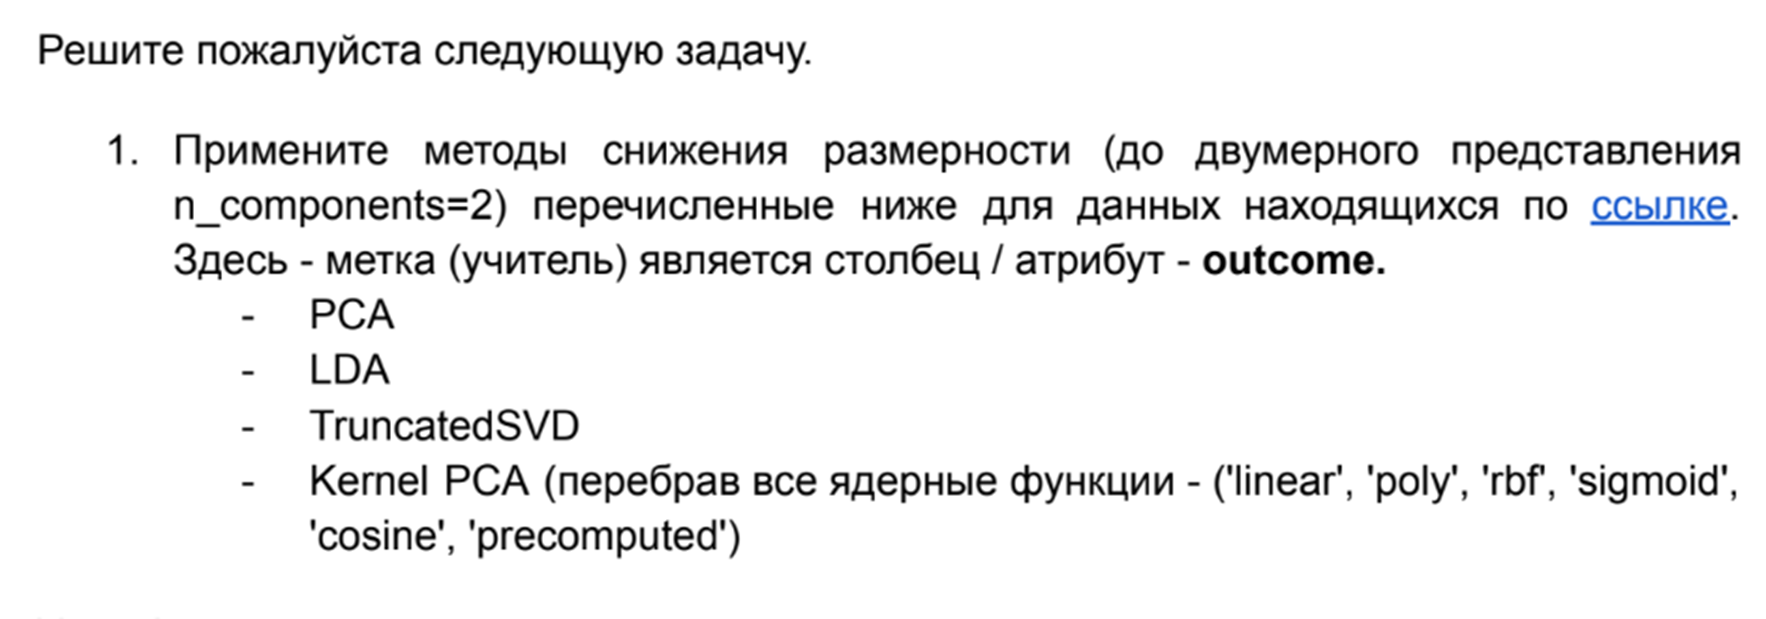

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Преобразование данных

In [4]:
X = data.drop(columns=['Outcome'])

In [7]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
px.box(X)

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [13]:
X_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [14]:
px.box(X_scaled)

# PCA линейный для снижения размерности до 2

In [22]:
X_scaled.shape

(768, 8)

In [15]:
# Применение PCA для снижения размерности до 2
pca = PCA(n_components=2)

reduced_data_pca = pca.fit_transform(X_scaled)

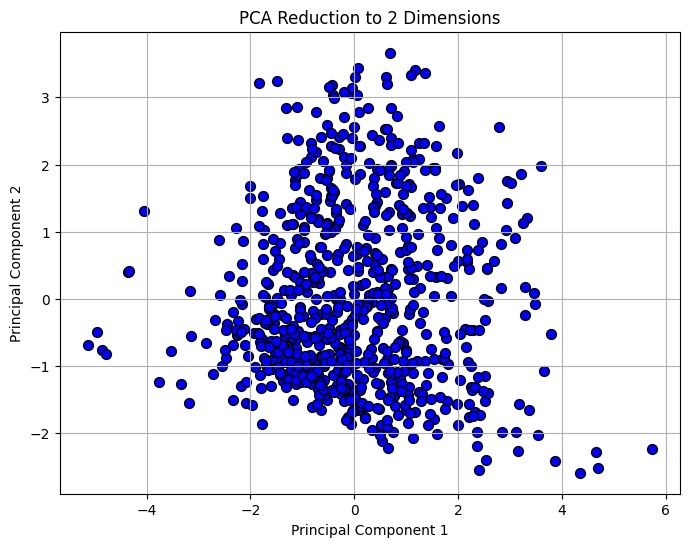

In [16]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_pca[:, 0], reduced_data_pca[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA Reduction to 2 Dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [17]:
pca.explained_variance_ratio_

array([0.26179749, 0.21640127])

In [18]:
pca.explained_variance_

array([2.09711056, 1.73346726])

In [19]:
pca.singular_values_

array([40.10590727, 36.4632608 ])

In [20]:
import numpy as np
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance = np.sum(explained_variance_ratio)
lost_variance = 1 - total_explained_variance

In [21]:
lost_variance

0.5218012392614343

In [10]:
KernelPCA?

Init signature:
KernelPCA(
    n_components=None,
    *,
    kernel='linear',
    gamma=None,
    degree=3,
    coef0=1,
    kernel_params=None,
    alpha=1.0,
    fit_inverse_transform=False,
    eigen_solver='auto',
    tol=0,
    max_iter=None,
    iterated_power='auto',
    remove_zero_eig=False,
    random_state=None,
    copy_X=True,
    n_jobs=None,
)
Docstring:     
Kernel Principal component analysis (KPCA).

Non-linear dimensionality reduction through the use of kernels [1]_, see also
:ref:`metrics`.

It uses the :func:`scipy.linalg.eigh` LAPACK implementation of the full SVD
or the :func:`scipy.sparse.linalg.eigsh` ARPACK implementation of the
truncated SVD, depending on the shape of the input data and the number of
components to extract. It can also use a randomized truncated SVD by the
method proposed in [3]_, see `eigen_solver`.

For a usage example and comparison between
Principal Components Analysis (PCA) and its kernelized version (KPCA), see
:ref:`sphx_glr_auto_exampl

In [23]:
# Применение PCA для снижения размерности до 2
kpca = KernelPCA(n_components=2, kernel='rbf')

reduced_data_kpca_rbf = kpca.fit_transform(X_scaled)

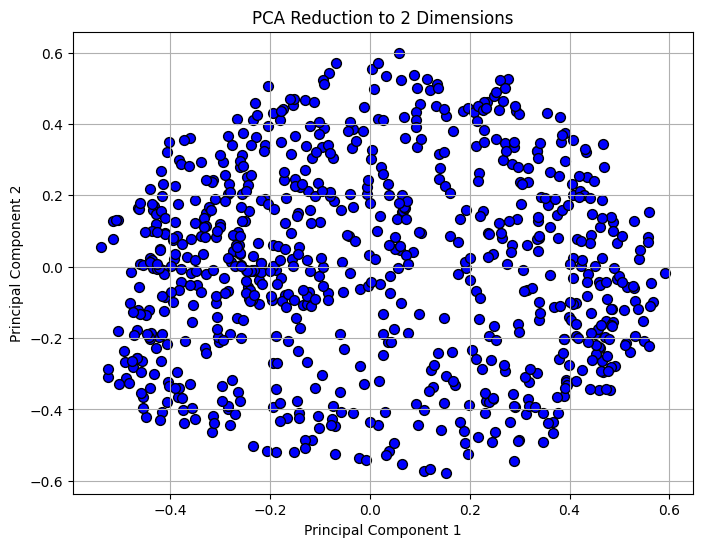

In [24]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_kpca_rbf[:, 0], reduced_data_kpca_rbf[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA Reduction to 2 Dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [26]:
kpca.eigenvectors_

array([[-0.04489971,  0.01132374],
       [ 0.05531287, -0.01188924],
       [-0.03509853, -0.02802449],
       ...,
       [ 0.02578782, -0.01162008],
       [-0.00862011, -0.05177192],
       [ 0.06305393,  0.00638364]])

In [27]:
kpca.eigenvalues_

array([73.76200605, 56.45760061])

In [30]:
explained_variance_ratio = kpca.eigenvalues_
normalized_explained_variance_ratio = explained_variance_ratio / np.sum(explained_variance_ratio) # преобразовать формулу

total_explained_variance = np.sum(normalized_explained_variance_ratio)
lost_variance = 1 - total_explained_variance

In [31]:
lost_variance

0.0

# PCA с разным ядром для снижения размерности до 2

In [36]:
# Применение PCA для снижения размерности до 2
kpca = KernelPCA(n_components=2, kernel='poly')

reduced_data_kpca = kpca.fit_transform(X_scaled)

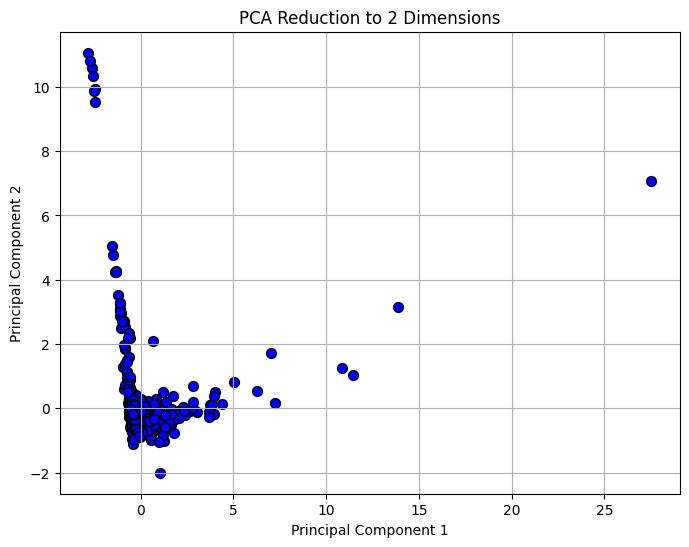

In [37]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_kpca[:, 0], reduced_data_kpca[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA Reduction to 2 Dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [38]:
kpca.eigenvalues_

array([1827.0919343 , 1210.33968593])

In [39]:
kpca.eigenvectors_

array([[-3.18204759e-03, -1.62799343e-02],
       [-1.09133768e-02, -5.74901245e-04],
       [-8.99458225e-03,  3.00744049e-05],
       ...,
       [-7.82203521e-03, -6.01674186e-03],
       [-1.15103486e-02, -2.24399958e-04],
       [-9.76231955e-03, -5.38110825e-03]])

In [40]:
# Применение PCA для снижения размерности до 2
kpca = KernelPCA(n_components=2, kernel='sigmoid')

reduced_data_kpca_sigmoid = kpca.fit_transform(X_scaled)

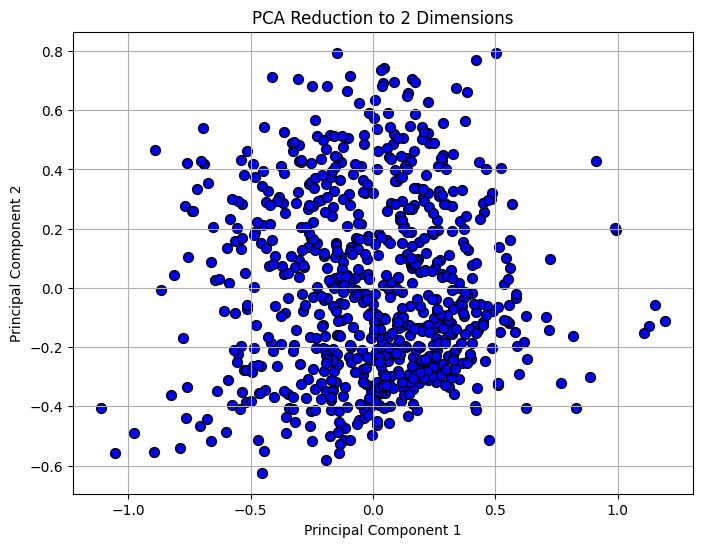

In [41]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_kpca_sigmoid[:, 0], reduced_data_kpca_sigmoid[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA Reduction to 2 Dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [42]:
kpca.eigenvalues_

array([87.00973286, 70.90530434])

In [43]:
kpca.eigenvectors_

array([[-0.02857783,  0.03169284],
       [ 0.02762537, -0.02004635],
       [ 0.00967603,  0.04710742],
       ...,
       [ 0.00585318,  0.00511728],
       [ 0.02587047,  0.02296505],
       [ 0.02051824, -0.03388775]])

In [44]:
# Применение PCA для снижения размерности до 2
kpca = KernelPCA(n_components=2, kernel='cosine')

reduced_data_kpca_cosine = kpca.fit_transform(X_scaled)

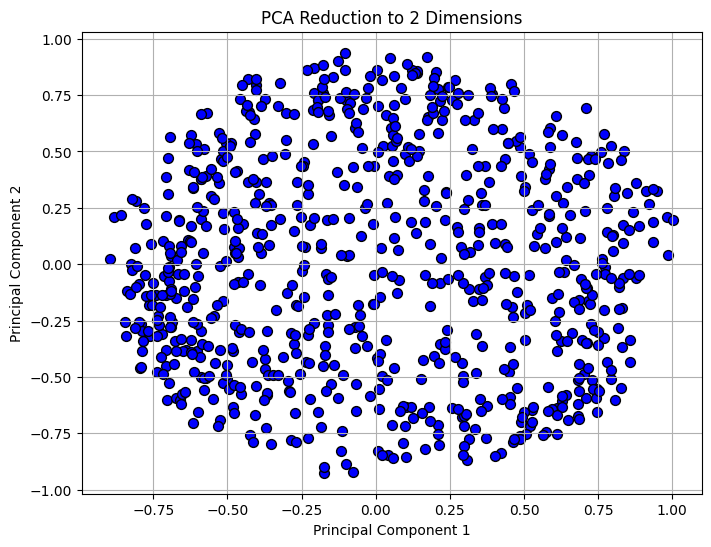

In [45]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_kpca_cosine[:, 0], reduced_data_kpca_cosine[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA Reduction to 2 Dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [46]:
kpca.eigenvalues_

array([193.01056957, 173.73718416])

In [47]:
kpca.eigenvectors_

array([[ 0.05992506,  0.00709356],
       [-0.04836774, -0.01132128],
       [ 0.03231878, -0.03611346],
       ...,
       [-0.00436077, -0.01368543],
       [ 0.00588089, -0.04929556],
       [-0.05465238,  0.00674543]])

In [51]:
data.shape[1]

9

# TruncatedSVD для снижения размерности до 2

In [15]:
TruncatedSVD?

Init signature:
TruncatedSVD(
    n_components=2,
    *,
    algorithm='randomized',
    n_iter=5,
    n_oversamples=10,
    power_iteration_normalizer='auto',
    random_state=None,
    tol=0.0,
)
Docstring:     
Dimensionality reduction using truncated SVD (aka LSA).

This transformer performs linear dimensionality reduction by means of
truncated singular value decomposition (SVD). Contrary to PCA, this
estimator does not center the data before computing the singular value
decomposition. This means it can work with sparse matrices
efficiently.

In particular, truncated SVD works on term count/tf-idf matrices as
returned by the vectorizers in :mod:`sklearn.feature_extraction.text`. In
that context, it is known as latent semantic analysis (LSA).

This estimator supports two algorithms: a fast randomized SVD solver, and
a "naive" algorithm that uses ARPACK as an eigensolver on `X * X.T` or
`X.T * X`, whichever is more efficient.

Read more in the :ref:`User Guide <LSA>`.

Parameters
---

In [85]:
# Применение tsvd для снижения размерности до 2
tsvd = TruncatedSVD(n_components=2)

reduced_data_tsvd = tsvd.fit_transform(X_scaled)

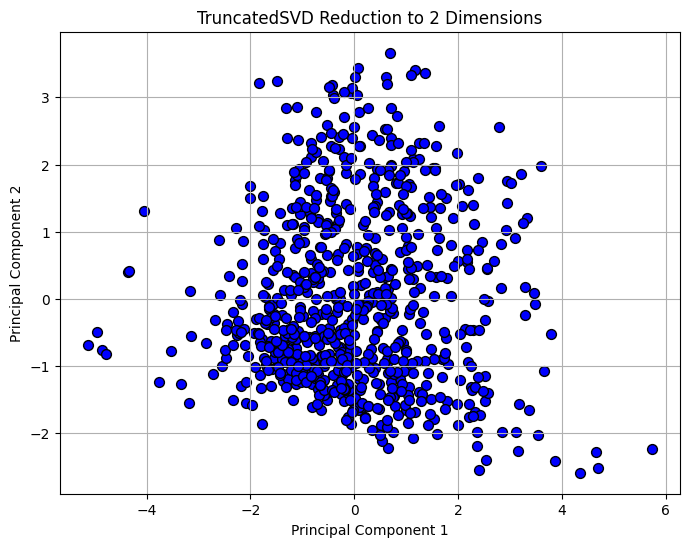

In [86]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_tsvd[:, 0], reduced_data_tsvd[:, 1], c='blue', edgecolor='k', s=50)
plt.title('TruncatedSVD Reduction to 2 Dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# LinearDiscriminantAnalysis

In [87]:
X_scaled.shape

(768, 8)

In [73]:
len(data['Outcome'])

768

In [79]:
X_scaled.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
dtype: int64

In [80]:
# LinearDiscriminantAnalysis

# Применение tsvd для снижения размерности до 2
lda = LinearDiscriminantAnalysis(n_components=2)

reduced_data_lda = lda.fit_transform(X.drop(columns=['Pregnancies']), X['Pregnancies'])

In [81]:
reduced_data_lda

array([[-1.69549115,  0.17316683],
       [ 0.2292214 , -1.09373198],
       [ 0.08384105,  1.16745777],
       ...,
       [ 0.32468883, -0.69573872],
       [-1.49621235,  0.31603133],
       [ 0.97305754, -0.40569273]])

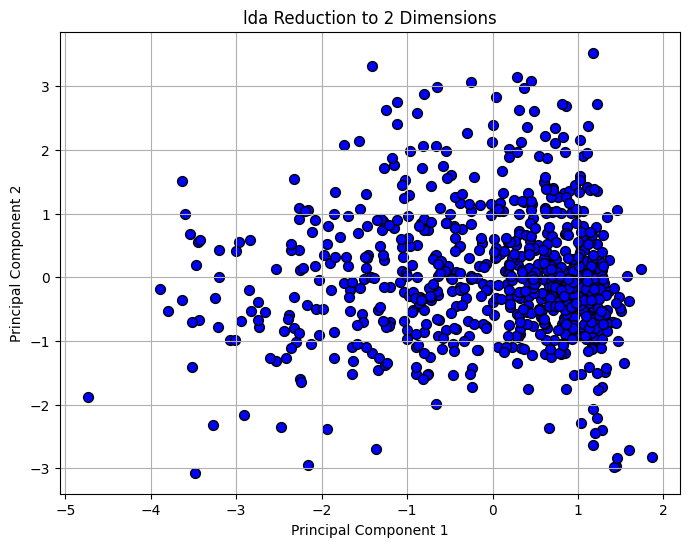

In [82]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_lda[:, 0], reduced_data_lda[:, 1], c='blue', edgecolor='k', s=50)
plt.title('lda Reduction to 2 Dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# TSNE для снижения размерности до 2

In [54]:
# TSNE
# Если столбцов признаков > 50, то применяется PCA с n до 50, а затем уже TSNE

# Применение TSNE для снижения размерности до 2
tsne = TSNE(n_components=2)

reduced_data_tsne = tsne.fit_transform(X)

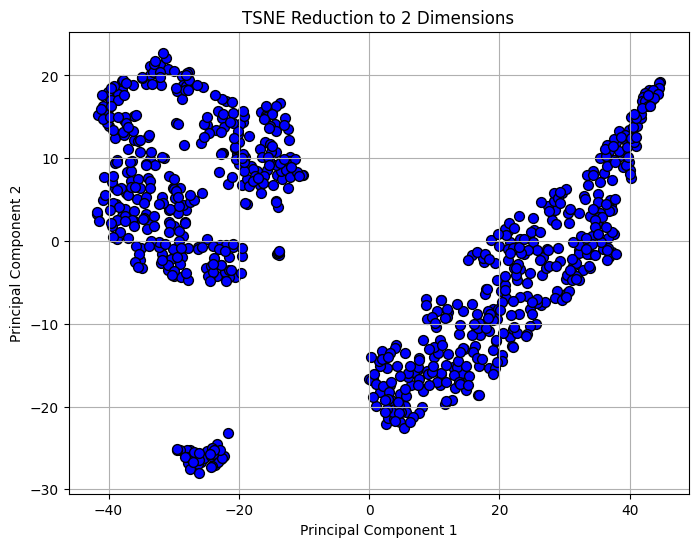

In [55]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c='blue', edgecolor='k', s=50)
plt.title('TSNE Reduction to 2 Dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# UMAP

In [59]:
reduced_data_umap = UMAP().fit_transform(X)


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [60]:
reduced_data_umap

array([[14.507441 , 11.3347   ],
       [11.31388  ,  9.645868 ],
       [15.162821 , 13.266002 ],
       ...,
       [ 1.0651808,  6.532699 ],
       [12.857953 , 13.289335 ],
       [11.576504 ,  9.384484 ]], dtype=float32)

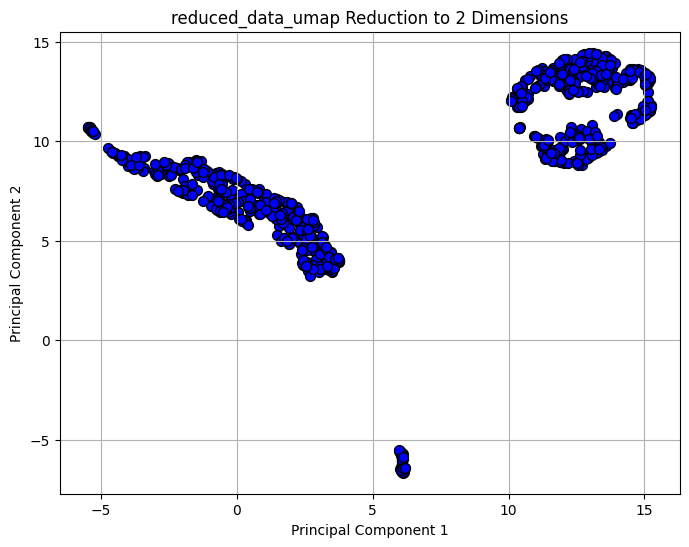

In [61]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_umap[:, 0], reduced_data_umap[:, 1], c='blue', edgecolor='k', s=50)
plt.title('reduced_data_umap Reduction to 2 Dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [62]:
reduced_data_umap = UMAP().fit_transform(X_scaled)

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



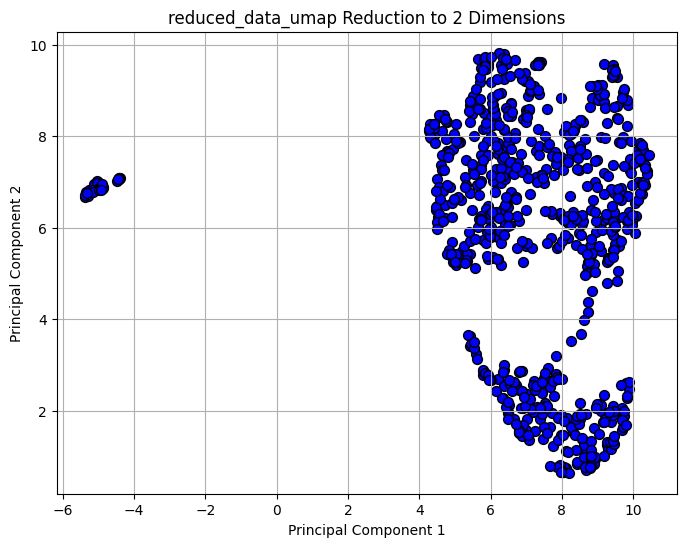

In [63]:
# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data_umap[:, 0], reduced_data_umap[:, 1], c='blue', edgecolor='k', s=50)
plt.title('reduced_data_umap Reduction to 2 Dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()